In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV, KFold, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, RocCurveDisplay
from catboost import CatBoostClassifier, Pool
from catboost import MetricVisualizer

In [3]:
df_test = pd.read_csv('test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


изучим уникальные значения в признаках 

In [7]:
cols = df.columns

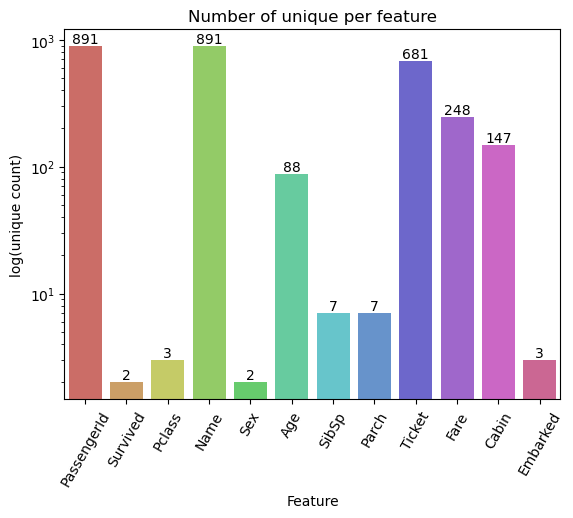

In [8]:

uniques = [df[col].nunique() for col in cols]

ax = sns.barplot(x=cols, y=uniques, palette='hls', log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique per feature')

for i in ax.containers:
    ax.bar_label(i,)
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.show()

изучение распределения всех признаков

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

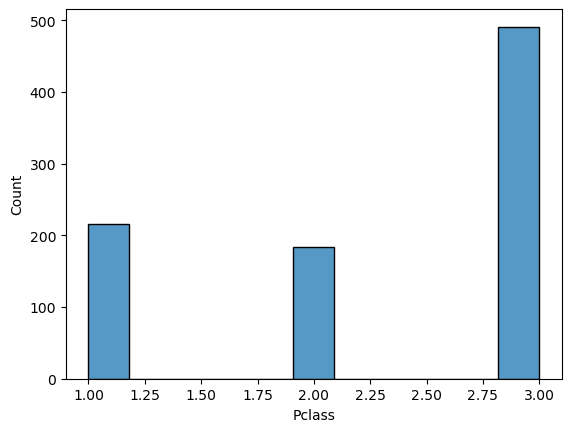

In [9]:
sns.histplot(df['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='Count'>

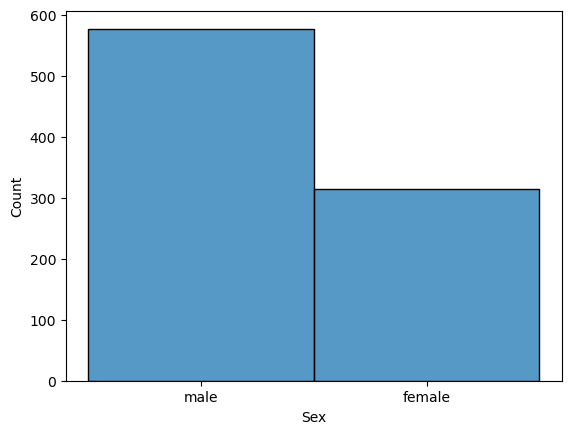

In [10]:
sns.histplot(df['Sex'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

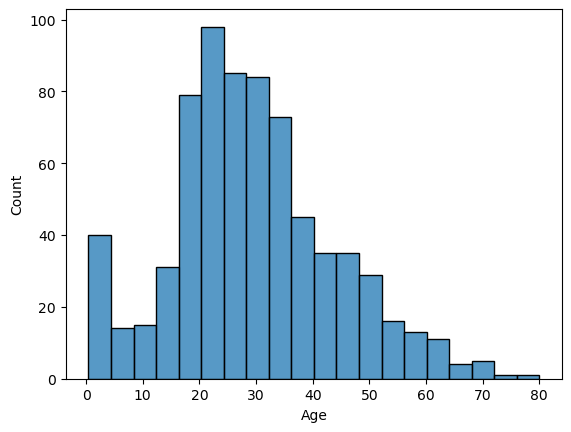

In [11]:
sns.histplot(df['Age'])

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

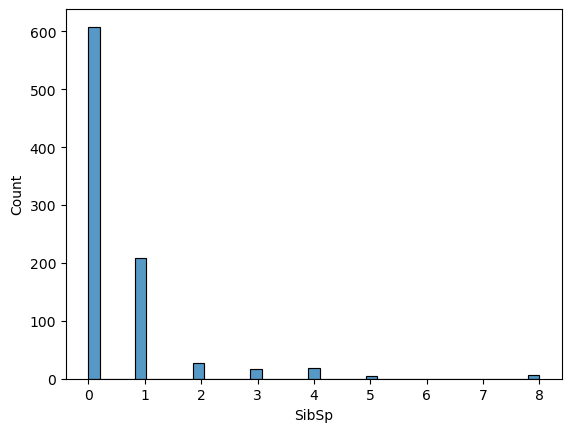

In [12]:
sns.histplot(df['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='Count'>

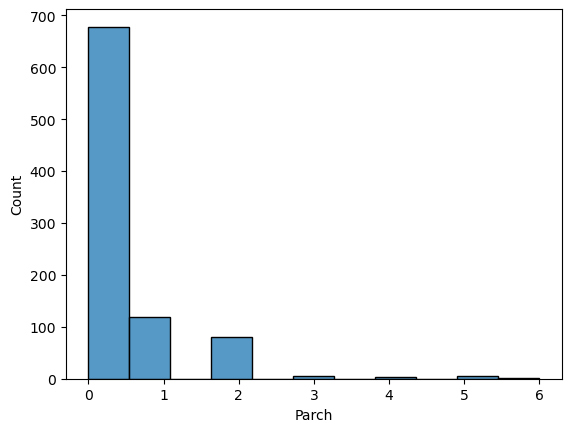

In [13]:
sns.histplot(df['Parch'])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

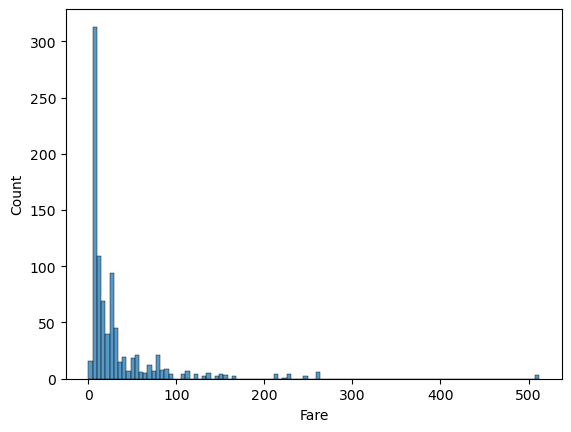

In [14]:
sns.histplot(df['Fare'])


<AxesSubplot:xlabel='Embarked', ylabel='Count'>

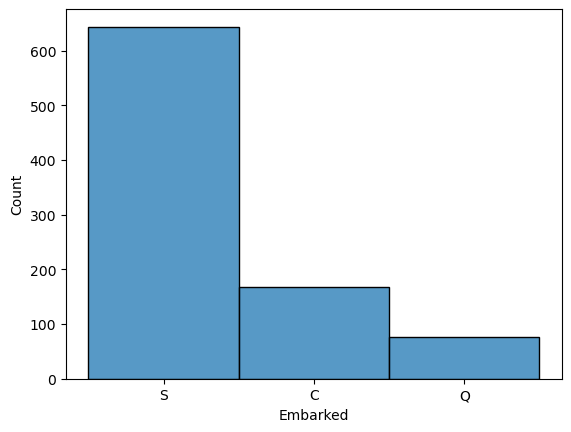

In [15]:
sns.histplot(df['Embarked'])

Изучение целевого признака

<AxesSubplot:xlabel='Survived', ylabel='Count'>

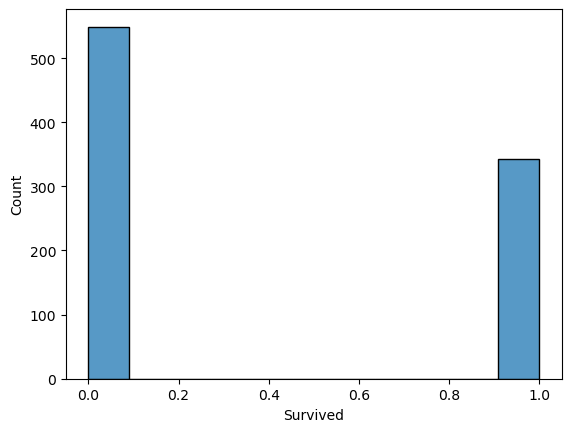

In [16]:
# проверим сотношние в целевой переменной
sns.histplot(df['Survived'])

In [17]:
cols = list(cols)
cols

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

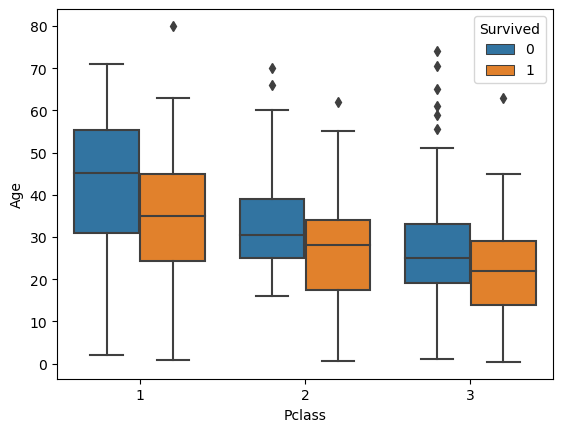

In [18]:
sns.boxplot(data=df, x="Pclass", y="Age", hue="Survived")

<AxesSubplot:xlabel='Survived', ylabel='Age'>

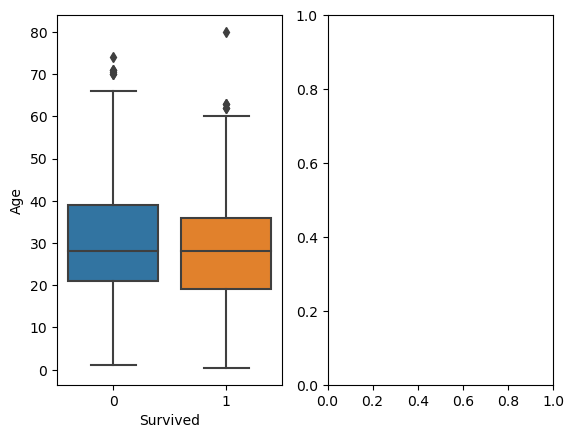

In [19]:
fig, axes = plt.subplots(1, 2)
sns.boxplot(data=df, x="Survived", y="Age", ax=axes[0])

Обработаем пустые значения

In [20]:
# Создадим ф-ю по обработке пустых значений
def fill_missed_data(data):
#     #  пустые значения в столбце age заполним модой
#     data["Age"] = data["Age"].fillna(data["Age"].mode()[0])
    
    
#     # Выделим название палубы из номера комнаты
#     data_deck = data[['PassengerId', 'Cabin']][~data['Cabin'].isna()]
#     data_deck['Deck'] = data_deck['Cabin'].apply(lambda x: x[0])
#     data_deck = data.merge(data_deck.drop('Cabin', axis=1), on='PassengerId', how='left')
#     data.drop('Cabin', axis=1, inplace=True) # Удалим колонку CAbin
#     # Заполним пустые значения значением UNKNOWN
#     data['Deck'] = data_deck['Deck'].fillna('UNKNOWN')
    data.fillna(-999, inplace=True)
    data.fillna(-999, inplace=True)

In [21]:
fill_missed_data(df)
fill_missed_data(df_test)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-999,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-999,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-999,S


### Обработаем признаки 

In [64]:
def preparing_data(data):
    # Выведем название палубы из колонки Cabin
    data['Deck'] = data['Cabin'].apply(lambda x: x[0] if type(x)==str else str(x))
    # Выделим титул пассажира
    data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].strip().split('.')[0])
    # Выделим колонку, если в билете есть буквы, то возвращает 1. Если нет, то0.
    data["New_ticket"] = data['Ticket'].apply(lambda x: 1 if any(char.isalpha() for char in x) else 0)

In [65]:
preparing_data(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,New_ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-999,S,-999,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-999,S,-999,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-999,S,-999,Mr,0


In [66]:
preparing_data(df_test)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,New_ticket
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,-999,Q,-999,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,-999,S,-999,Mrs,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,-999,Q,-999,Mr,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,-999,S,-999,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,-999,S,-999,Mrs,0


In [67]:
df.drop("PassengerId", axis=1, inplace=True)
df.drop("Name", axis=1, inplace=True)
df.drop("Ticket", axis=1, inplace=True)

df_test.drop("Name", axis=1, inplace=True)
df_test.drop("Ticket", axis=1, inplace=True)

In [68]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Title,New_ticket
0,0,3,male,22.0,1,0,7.2500,-999,S,-999,Mr,1
1,1,1,female,38.0,1,0,71.2833,C85,C,C,Mrs,1
2,1,3,female,26.0,0,0,7.9250,-999,S,-999,Miss,1
3,1,1,female,35.0,1,0,53.1000,C123,S,C,Mrs,0
4,0,3,male,35.0,0,0,8.0500,-999,S,-999,Mr,0


In [69]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [70]:
# Выделим категориальные признаки

In [71]:
print(X.dtypes)
categorical_feature_indices = np.where(X.dtypes != float)[0]
categorical_feature_indices

Pclass          int64
Sex            object
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Cabin          object
Embarked       object
Deck           object
Title          object
New_ticket      int64
dtype: object


array([ 0,  1,  3,  4,  6,  7,  8,  9, 10], dtype=int64)

In [73]:
X_whole_train, X_test, y_whole_train, y_test = train_test_split(X, y, stratify=y,
                                                  train_size=0.9, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_whole_train, y_whole_train,
                                                  stratify=y_whole_train, train_size=0.8, random_state=42)

In [74]:
# Напишем полезные функции для обучения, и валидации, и изображения

In [75]:
#Создадим ф-ю обучения gridsearch
def train_gridsearch(model, param_grid, X, y, name):
    kfold = KFold(n_splits=3)
    
    pipeline = Pipeline([(name, model)])
    
    grid_search = GridSearchCV(model, 
                              param_grid=param_grid,
                              cv=kfold,
                              scoring='accuracy')
    grid_search.fit(X, y)
    
#     выведем лучшую метрику и лучшую модель
    print('The best model params: ', grid_search.best_params_)
    print('The best model score: ', grid_search.best_score_)
    
    return grid_search.best_estimator_

In [76]:
# функция вывода метрик
def model_metrics(model, name: str):
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_valid = accuracy_score(y_val, y_val_pred)
    
#     y_pred_all = model.predict(X_train)
    y_train_pred_proba = model.predict_proba(X_train)
    y_valid_pred_proba = model.predict_proba(X_val)
    
    rocauc_train = roc_auc_score(y_train, y_train_pred_proba[:,1])
    rocauc_valid = roc_auc_score(y_val, y_valid_pred_proba[:,1])
    
    print(f'{name} accuracy на трейновой выборке = {accuracy_train}')
    print(f'{name} accuracy на валидной выборке = {accuracy_valid}')
    
    print(f'{name} RocAUC на трейновой выборке = {rocauc_train}')
    print(f'{name} RocAUC на валидной выборке = {rocauc_valid}')


In [77]:
def print_roc_auc(model, name):
    '''Фукнция изображения rocauc на валидной X_valid
    '''
    y_pred_prob_val = model.predict_proba(X_valid)
    
    fpr, tpr, threshold = roc_curve(y_valid, y_pred_prob_val[:, 1])
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label="ROC curve")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(name)
    plt.legend(loc='lower right')
#     RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
#     plt.show()

In [78]:
# Создадим ф-ю, которая обучает и валидирует лучшую модель на валидных данных
def train_valid(model, param_grid, X_train, y_train, name:'str'):
    
    best_model = train_gridsearch(
        
        model=model,
        param_grid=param_grid,
        X=X_train,
        y=y_train,
        name=name)
    
    model_metrics(best_model, name)
    
    print_roc_auc(best_model, name)
    
    return best_model

### Базовая модель

In [79]:
# Обучим модель catboost 
from catboost import metrics
base_model = CatBoostClassifier(
    early_stopping_rounds=20,
    loss_function="Logloss",
    custom_loss=[metrics.Accuracy(), metrics.AUC()],
    train_dir='base_model')


In [80]:
base_model.fit(X_train, y_train,
             cat_features=categorical_feature_indices,
             eval_set=(X_val, y_val),
             plot=True,
             verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [81]:
model_metrics(base_model, name='Base_model')

Base_model accuracy на трейновой выборке = 0.85
Base_model accuracy на валидной выборке = 0.8509316770186336
Base_model RocAUC на трейновой выборке = 0.9183415138207182
Base_model RocAUC на валидной выборке = 0.8765884652981428


In [82]:
## Подберем параметры методом GridSearchCV

In [83]:
# Обучим модель catboost 
SEED = 100
cat_model_2 = CatBoostClassifier(early_stopping_rounds=20,
                               custom_metric='Accuracy',
                              eval_metric='Accuracy',
                              random_seed=SEED,
                              verbose=False,
                                cat_features=categorical_feature_indices,)

grid = {'random_seed': [0, 200, 400],
        'iterations': [100, 500, 1000],
        'learning_rate': [0.03, 0.1, 0.2],
        'depth': [3, 6, 10],
        'l2_leaf_reg': [1, 5, 10]}

# cat_model.fit(X_train, y_train, verbose=False, eval_set=(X_valid, y_valid),  use_best_model=True)

# Применим встроенную ф-ю gridsearchcv
grid_search_result = cat_model_2.grid_search(param_grid=grid,
                                             X=X_train,
                                             y=y_train,
                                             verbose=False,
                                             plot=True,
                                             stratified=True
                                           
                                          )


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8046875
bestIteration = 4

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8125
bestIteration = 16

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8359375
bestIteration = 33

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8046875
bestIteration = 4

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8125
bestIteration = 18

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.828125
bestIteration = 44

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8046875
bestIteration = 1

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8125
bestIteration = 18

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8125
bestIteration = 12

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.7890625
bestIteration = 20

Stopped by overfitting detector  (20 iterations wait)

b

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.828125
bestIteration = 0

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.828125
bestIteration = 0

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8359375
bestIteration = 10

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8203125
bestIteration = 4

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.828125
bestIteration = 15

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8125
bestIteration = 5

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8125
bestIteration = 14

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8046875
bestIteration = 22

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8125
bestIteration = 12

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.78125
bestIteration = 9

Stopped by overfitting detector  (20 iterations wait)

best

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8203125
bestIteration = 1

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8515625
bestIteration = 20

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8203125
bestIteration = 1

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8203125
bestIteration = 1

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.84375
bestIteration = 19

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8203125
bestIteration = 1

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8203125
bestIteration = 1

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8203125
bestIteration = 1

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8203125
bestIteration = 1

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8203125
bestIteration = 1

Stopped by overfitting detector  (20 iterations wa

In [84]:
print(f'Params: {grid_search_result["params"]}')
print(f'the best accuracy is : {cat_model_2.best_score_}')
model_metrics(cat_model_2, name='CatBoost_grid_search')
# cat_model.get_all_params()


Params: {'depth': 6, 'random_seed': 200, 'l2_leaf_reg': 1, 'iterations': 100, 'learning_rate': 0.2}
the best accuracy is : {'learn': {'Accuracy': 0.9140625, 'Logloss': 0.2696446633574432}}
CatBoost_grid_search accuracy на трейновой выборке = 0.86875
CatBoost_grid_search accuracy на валидной выборке = 0.8385093167701864
CatBoost_grid_search RocAUC на трейновой выборке = 0.9286230948075433
CatBoost_grid_search RocAUC на валидной выборке = 0.8688497882046269


In [85]:
# Сделаем перебор гиперпараметров методом Optuna

In [100]:
import optuna


In [101]:
def objective(trial):
    
    param = {
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.001, 5, log=True),
        #'rsm': trial.suggest_uniform('rsm', 0.3, 1.0),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1),
        'max_depth': trial.suggest_int('max_depth', 2, 9),
#         'n_estimators': trial.suggest_int('n_estimators', 2000, 8000),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 20),        
        'max_bin': trial.suggest_int('max_bin', 200, 400),
        'iterations': trial.suggest_int('iterations', 200, 2000),
        'random_seed': trial.suggest_int('random_seed', 0, 400),
        
        'eval_metric': 'Logloss',#'AUC',
#         'bagging_temperature': 1,
        'one_hot_max_size': 2,
        'early_stopping_rounds': 20,
        'loss_function': "Logloss",
        'custom_loss': [metrics.Accuracy(), metrics.AUC()],
        'verbose': False
    }
    
    model = CatBoostClassifier(**param)  
    
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False, cat_features=categorical_feature_indices,)
    
#     preds = model.predict_proba(X_val)[:,1]
    preds = model.predict(X_val)
    
    accuracy = accuracy_score(y_val, preds)

    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200, timeout=1200, n_jobs=3)

[I 2023-10-28 12:07:37,217] A new study created in memory with name: no-name-0baa49b0-62db-477d-8358-bb710b02ee89
[I 2023-10-28 12:07:41,405] Trial 0 finished with value: 0.8322981366459627 and parameters: {'l2_leaf_reg': 0.021789897472930822, 'subsample': 0.16802308564516943, 'learning_rate': 0.06285069991300177, 'max_depth': 7, 'min_data_in_leaf': 15, 'max_bin': 373, 'iterations': 1637, 'random_seed': 29}. Best is trial 0 with value: 0.8322981366459627.
[I 2023-10-28 12:07:43,130] Trial 1 finished with value: 0.8385093167701864 and parameters: {'l2_leaf_reg': 0.8610700313853816, 'subsample': 0.40431054457992044, 'learning_rate': 0.07087442496483767, 'max_depth': 3, 'min_data_in_leaf': 19, 'max_bin': 358, 'iterations': 691, 'random_seed': 63}. Best is trial 1 with value: 0.8385093167701864.
[I 2023-10-28 12:07:43,702] Trial 2 finished with value: 0.8571428571428571 and parameters: {'l2_leaf_reg': 0.5965299707672085, 'subsample': 0.43850054391039706, 'learning_rate': 0.0224269712557644

[I 2023-10-28 12:08:32,048] Trial 24 finished with value: 0.8509316770186336 and parameters: {'l2_leaf_reg': 0.002469584882107944, 'subsample': 0.9958269891700002, 'learning_rate': 0.0817004712336574, 'max_depth': 3, 'min_data_in_leaf': 5, 'max_bin': 353, 'iterations': 1348, 'random_seed': 88}. Best is trial 7 with value: 0.8757763975155279.
[I 2023-10-28 12:08:32,461] Trial 25 finished with value: 0.84472049689441 and parameters: {'l2_leaf_reg': 0.028305158637364894, 'subsample': 0.9104069536245438, 'learning_rate': 0.08723388613918456, 'max_depth': 3, 'min_data_in_leaf': 5, 'max_bin': 358, 'iterations': 1312, 'random_seed': 111}. Best is trial 7 with value: 0.8757763975155279.
[I 2023-10-28 12:08:34,093] Trial 26 finished with value: 0.8509316770186336 and parameters: {'l2_leaf_reg': 0.013496691639045436, 'subsample': 0.8962661066389805, 'learning_rate': 0.04844307993764414, 'max_depth': 3, 'min_data_in_leaf': 12, 'max_bin': 357, 'iterations': 1261, 'random_seed': 102}. Best is trial

[I 2023-10-28 12:09:09,222] Trial 47 finished with value: 0.8633540372670807 and parameters: {'l2_leaf_reg': 1.263265566096694, 'subsample': 0.2504128116632664, 'learning_rate': 0.040554951891101525, 'max_depth': 2, 'min_data_in_leaf': 6, 'max_bin': 346, 'iterations': 1057, 'random_seed': 264}. Best is trial 7 with value: 0.8757763975155279.
[I 2023-10-28 12:09:10,455] Trial 49 finished with value: 0.8571428571428571 and parameters: {'l2_leaf_reg': 1.4798941596817838, 'subsample': 0.2699621013508223, 'learning_rate': 0.0529079314468106, 'max_depth': 2, 'min_data_in_leaf': 6, 'max_bin': 346, 'iterations': 555, 'random_seed': 271}. Best is trial 7 with value: 0.8757763975155279.
[I 2023-10-28 12:09:16,704] Trial 51 finished with value: 0.8695652173913043 and parameters: {'l2_leaf_reg': 2.516484496595878, 'subsample': 0.6344516893816918, 'learning_rate': 0.05229282848333642, 'max_depth': 4, 'min_data_in_leaf': 14, 'max_bin': 292, 'iterations': 426, 'random_seed': 227}. Best is trial 7 wit

[I 2023-10-28 12:09:51,111] Trial 72 finished with value: 0.8198757763975155 and parameters: {'l2_leaf_reg': 0.02048705057180408, 'subsample': 0.9640609013919672, 'learning_rate': 0.08072717989900836, 'max_depth': 7, 'min_data_in_leaf': 5, 'max_bin': 364, 'iterations': 651, 'random_seed': 357}. Best is trial 7 with value: 0.8757763975155279.
[I 2023-10-28 12:09:52,919] Trial 73 finished with value: 0.8509316770186336 and parameters: {'l2_leaf_reg': 1.0133407613352614, 'subsample': 0.9546079181151141, 'learning_rate': 0.07898590813519028, 'max_depth': 3, 'min_data_in_leaf': 9, 'max_bin': 287, 'iterations': 645, 'random_seed': 57}. Best is trial 7 with value: 0.8757763975155279.
[I 2023-10-28 12:09:55,086] Trial 75 finished with value: 0.8633540372670807 and parameters: {'l2_leaf_reg': 1.6462927348789933, 'subsample': 0.9663160304809253, 'learning_rate': 0.06909714335412831, 'max_depth': 3, 'min_data_in_leaf': 9, 'max_bin': 287, 'iterations': 594, 'random_seed': 76}. Best is trial 7 with

[I 2023-10-28 12:10:30,232] Trial 94 finished with value: 0.8571428571428571 and parameters: {'l2_leaf_reg': 1.0924854749337938, 'subsample': 0.9790929975371285, 'learning_rate': 0.0552825138060938, 'max_depth': 5, 'min_data_in_leaf': 14, 'max_bin': 285, 'iterations': 1266, 'random_seed': 68}. Best is trial 7 with value: 0.8757763975155279.
[I 2023-10-28 12:10:31,999] Trial 97 finished with value: 0.84472049689441 and parameters: {'l2_leaf_reg': 2.2840238907777017, 'subsample': 0.9090726796358448, 'learning_rate': 0.05191432745951256, 'max_depth': 2, 'min_data_in_leaf': 14, 'max_bin': 285, 'iterations': 543, 'random_seed': 27}. Best is trial 7 with value: 0.8757763975155279.
[I 2023-10-28 12:10:34,955] Trial 98 finished with value: 0.8571428571428571 and parameters: {'l2_leaf_reg': 2.3375796650418676, 'subsample': 0.842320697036203, 'learning_rate': 0.05757901679053806, 'max_depth': 2, 'min_data_in_leaf': 14, 'max_bin': 298, 'iterations': 444, 'random_seed': 139}. Best is trial 7 with 

[I 2023-10-28 12:11:15,567] Trial 121 finished with value: 0.8260869565217391 and parameters: {'l2_leaf_reg': 2.117209268252873, 'subsample': 0.18301437139987448, 'learning_rate': 0.07342065166653824, 'max_depth': 6, 'min_data_in_leaf': 5, 'max_bin': 293, 'iterations': 379, 'random_seed': 252}. Best is trial 7 with value: 0.8757763975155279.
[I 2023-10-28 12:11:15,768] Trial 120 finished with value: 0.84472049689441 and parameters: {'l2_leaf_reg': 1.0652010046795604, 'subsample': 0.9937581917593186, 'learning_rate': 0.03705469954132678, 'max_depth': 6, 'min_data_in_leaf': 20, 'max_bin': 321, 'iterations': 385, 'random_seed': 301}. Best is trial 7 with value: 0.8757763975155279.
[I 2023-10-28 12:11:16,085] Trial 122 finished with value: 0.8260869565217391 and parameters: {'l2_leaf_reg': 0.003167102070222488, 'subsample': 0.18653638466508077, 'learning_rate': 0.0735205066307587, 'max_depth': 4, 'min_data_in_leaf': 11, 'max_bin': 291, 'iterations': 922, 'random_seed': 252}. Best is trial 

[I 2023-10-28 12:11:54,393] Trial 144 finished with value: 0.8509316770186336 and parameters: {'l2_leaf_reg': 1.9750644062311682, 'subsample': 0.5849957290143253, 'learning_rate': 0.042391230396133635, 'max_depth': 6, 'min_data_in_leaf': 8, 'max_bin': 292, 'iterations': 565, 'random_seed': 16}. Best is trial 7 with value: 0.8757763975155279.
[I 2023-10-28 12:11:55,975] Trial 145 finished with value: 0.8509316770186336 and parameters: {'l2_leaf_reg': 1.9193899466211801, 'subsample': 0.5834687863985465, 'learning_rate': 0.03310673048302146, 'max_depth': 6, 'min_data_in_leaf': 8, 'max_bin': 309, 'iterations': 614, 'random_seed': 16}. Best is trial 7 with value: 0.8757763975155279.
[I 2023-10-28 12:11:56,308] Trial 146 finished with value: 0.84472049689441 and parameters: {'l2_leaf_reg': 2.8135378177219406, 'subsample': 0.4955440097350986, 'learning_rate': 0.04431877849059059, 'max_depth': 6, 'min_data_in_leaf': 8, 'max_bin': 285, 'iterations': 530, 'random_seed': 19}. Best is trial 7 with

[I 2023-10-28 12:12:26,953] Trial 168 finished with value: 0.8260869565217391 and parameters: {'l2_leaf_reg': 0.0033890384899491746, 'subsample': 0.7145554287043536, 'learning_rate': 0.06662306862487406, 'max_depth': 6, 'min_data_in_leaf': 14, 'max_bin': 290, 'iterations': 1450, 'random_seed': 282}. Best is trial 7 with value: 0.8757763975155279.
[I 2023-10-28 12:12:27,981] Trial 169 finished with value: 0.8571428571428571 and parameters: {'l2_leaf_reg': 0.1699113060601664, 'subsample': 0.6235393247717662, 'learning_rate': 0.06679670017219043, 'max_depth': 6, 'min_data_in_leaf': 3, 'max_bin': 290, 'iterations': 518, 'random_seed': 50}. Best is trial 7 with value: 0.8757763975155279.
[I 2023-10-28 12:12:30,479] Trial 171 finished with value: 0.8509316770186336 and parameters: {'l2_leaf_reg': 3.7639638245321105, 'subsample': 0.8859996939863592, 'learning_rate': 0.061917834673057656, 'max_depth': 4, 'min_data_in_leaf': 5, 'max_bin': 298, 'iterations': 476, 'random_seed': 242}. Best is tri

[I 2023-10-28 12:13:11,054] Trial 191 finished with value: 0.8695652173913043 and parameters: {'l2_leaf_reg': 4.943575850783802, 'subsample': 0.9749385154918427, 'learning_rate': 0.033462186828590194, 'max_depth': 3, 'min_data_in_leaf': 8, 'max_bin': 298, 'iterations': 684, 'random_seed': 223}. Best is trial 7 with value: 0.8757763975155279.
[I 2023-10-28 12:13:15,927] Trial 193 finished with value: 0.84472049689441 and parameters: {'l2_leaf_reg': 2.7858405383122338, 'subsample': 0.9772840113783208, 'learning_rate': 0.06779168958141531, 'max_depth': 6, 'min_data_in_leaf': 5, 'max_bin': 342, 'iterations': 666, 'random_seed': 9}. Best is trial 7 with value: 0.8757763975155279.
[I 2023-10-28 12:13:16,018] Trial 194 finished with value: 0.84472049689441 and parameters: {'l2_leaf_reg': 2.42587056549764, 'subsample': 0.9883183408341192, 'learning_rate': 0.06777529048898422, 'max_depth': 6, 'min_data_in_leaf': 19, 'max_bin': 340, 'iterations': 1373, 'random_seed': 214}. Best is trial 7 with v

In [102]:
import lightgbm as lgb
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_rank
from optuna.visualization import plot_slice
from optuna.visualization import plot_timeline

In [103]:
study.metric_names

In [104]:
plot_optimization_history(study)

In [105]:
plot_parallel_coordinate(study)

In [106]:
plot_param_importances(study)

In [107]:
plot_slice(study)

In [108]:
plot_edf(study)

In [109]:
plot_timeline(study)

C:\Users\Михаил\AppData\Local\Temp\ipykernel_1704\547629393.py:1: ExperimentalWarning:

plot_timeline is experimental (supported from v3.2.0). The interface can change in the future.



In [110]:
print("Best values:", study.best_value)

Best values: 0.8757763975155279


In [111]:
study.best_params

{'l2_leaf_reg': 0.001755237806772944,
 'subsample': 0.8395118999381919,
 'learning_rate': 0.039493607338845396,
 'max_depth': 2,
 'min_data_in_leaf': 9,
 'max_bin': 336,
 'iterations': 950,
 'random_seed': 242}

In [127]:
best_param = {        
        'eval_metric': 'Logloss',#'AUC',
#         'bagging_temperature': 1,
        'one_hot_max_size': 2,
        'early_stopping_rounds': 50,
        'loss_function': "Logloss",
        'custom_loss': [metrics.Accuracy(), metrics.AUC()],
        'verbose': False,
        'train_dir': 'best_model'}

best_param.update(study.best_params)

best_model = CatBoostClassifier(**best_param) 

best_model.fit(X_train, y_train,
             cat_features=categorical_feature_indices,
             eval_set=(X_val, y_val),
               plot=True
              )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [129]:
MetricVisualizer(['base_model', 'best_model']).start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

KeyboardInterrupt: 

In [130]:
model_metrics(best_model, name='Best_model')

Best_model accuracy на трейновой выборке = 0.8703125
Best_model accuracy на валидной выборке = 0.8757763975155279
Best_model RocAUC на трейновой выборке = 0.9121880650994575
Best_model RocAUC на валидной выборке = 0.8846529814271749


In [131]:
best_model.get_params()

{'iterations': 950,
 'learning_rate': 0.039493607338845396,
 'l2_leaf_reg': 0.001755237806772944,
 'loss_function': 'Logloss',
 'random_seed': 242,
 'verbose': False,
 'one_hot_max_size': 2,
 'train_dir': 'best_model',
 'custom_loss': ['Accuracy', 'AUC'],
 'eval_metric': 'Logloss',
 'subsample': 0.8395118999381919,
 'max_depth': 2,
 'max_bin': 336,
 'early_stopping_rounds': 50,
 'min_data_in_leaf': 9}

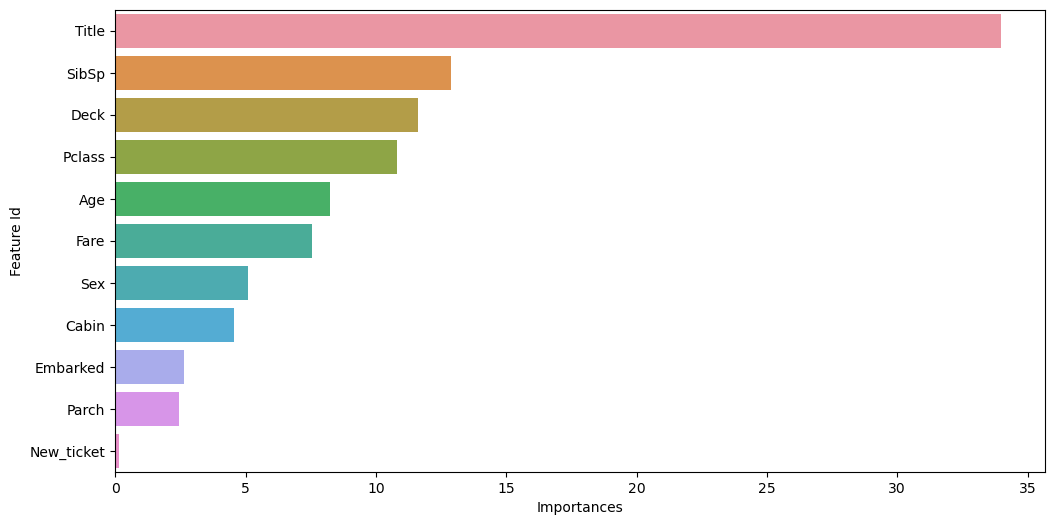

In [122]:
plt.figure(figsize=(12, 6))
sns.barplot(data= best_model.get_feature_importance(prettified=True),
            x="Importances",
           y='Feature Id')
plt.show()

In [123]:
import shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:100,:], X_train.iloc[:100,:])

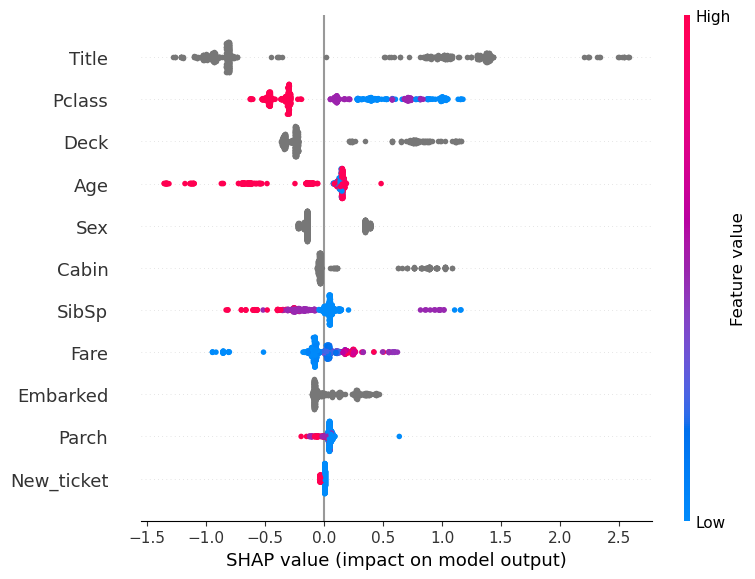

In [124]:
shap.summary_plot(shap_values, X_train)

In [139]:
train_dir = {'train_dir': 'final_model',
            'early_stopping_rounds': 100}
final_param = best_param
final_param.update(train_dir)
final_param

{'eval_metric': 'Logloss',
 'one_hot_max_size': 2,
 'early_stopping_rounds': 100,
 'loss_function': 'Logloss',
 'custom_loss': [Accuracy(type='Classic' [mandatory=False], use_weights=True [mandatory=False]),
  AUC(hints='skip_train~true' [mandatory=False], type='Classic' [mandatory=False], use_weights=False [mandatory=False])],
 'verbose': False,
 'train_dir': 'final_model',
 'l2_leaf_reg': 0.001755237806772944,
 'subsample': 0.8395118999381919,
 'learning_rate': 0.039493607338845396,
 'max_depth': 2,
 'min_data_in_leaf': 9,
 'max_bin': 336,
 'iterations': 950,
 'random_seed': 242}

In [140]:


final_model = CatBoostClassifier(**final_param) 

final_model.fit(X_whole_train, y_whole_train,
            cat_features=categorical_feature_indices,
            plot=True,
            eval_set=(X_test, y_test),
              )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [146]:
predictions = final_model.predict(df_test.drop(['PassengerId'], axis=1))

In [147]:
# Без обработанных признаков качество тесте - 0,775

In [148]:
df_test['Survived'] = predictions

In [149]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Title,New_ticket,Survived
0,892,3,male,34.5,0,0,7.8292,-999,Q,-999,Mr,0,0
1,893,3,female,47.0,1,0,7.0000,-999,S,-999,Mrs,0,0
2,894,2,male,62.0,0,0,9.6875,-999,Q,-999,Mr,0,0
3,895,3,male,27.0,0,0,8.6625,-999,S,-999,Mr,0,0
4,896,3,female,22.0,1,1,12.2875,-999,S,-999,Mrs,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,-999.0,0,0,8.0500,-999,S,-999,Mr,1,0
414,1306,1,female,39.0,0,0,108.9000,C105,C,C,Dona,1,1
415,1307,3,male,38.5,0,0,7.2500,-999,S,-999,Mr,1,0
416,1308,3,male,-999.0,0,0,8.0500,-999,S,-999,Mr,0,0


In [150]:
df_test[['PassengerId', 'Survived']].to_csv('Predicts_titanic_3_1_best.csv', index=False)